In [2]:
import optionsdata as od
from datetime import datetime
import pandas as pd

In [ ]:
failed = await od.fetch_options(["ZEB"], datetime(2024, 1, 1).date(), datetime(2025, 2, 18).date())
print(failed)

In [ ]:
df = pd.read_parquet('data/2024_TRI.parquet')
df[df["volume"] > 0]

In [15]:
bmo = pd.read_parquet('data/2024_BMO.parquet')
bn = pd.read_parquet('data/2024_BN.parquet')
bns = pd.read_parquet('data/2024_BNS.parquet')
cp = pd.read_parquet('data/2024_CP.parquet')
enb = pd.read_parquet('data/2024_ENB.parquet')
ry = pd.read_parquet('data/2024_RY.parquet')
shop = pd.read_parquet('data/2024_SHOP.parquet')
td = pd.read_parquet('data/2024_TD.parquet')
tri = pd.read_parquet('data/2024_TRI.parquet')
xiu = pd.read_parquet('data/2024_XIU.parquet')
zeb = pd.read_parquet('data/2024_ZEB.parquet')

In [ ]:
dfs = [bmo, bn, bns, cp, enb, ry, shop, td, tri, xiu, zeb]
merged = pd.concat(dfs)
merged

In [3]:
df = pd.read_parquet('data/2024_ALL.parquet')

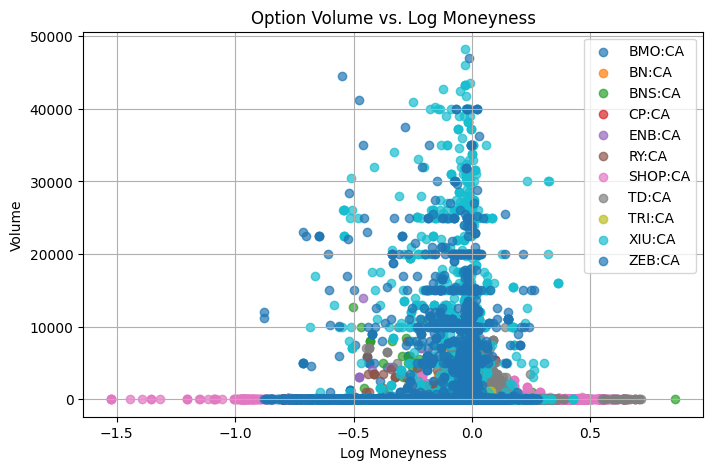

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample DataFrame structure
# df should have columns: 'symbol', 'stock_price', 'strike_price', 'volume'

def plot_option_volume(df, stock_symbols):
    plt.figure(figsize=(8, 5))

    for symbol in stock_symbols:
        stock_data = df[df['underlying_symbol'] == symbol].copy()

        # Compute log moneyness
        stock_data['log_moneyness'] = np.log(stock_data['strike'] / stock_data['underlying_price'])

        # Scatter plot for each stock symbol
        plt.scatter(stock_data['log_moneyness'], stock_data['volume'], alpha=0.7, label=symbol)

    plt.xlabel("Log Moneyness")
    plt.ylabel("Volume")
    plt.title("Option Volume vs. Log Moneyness")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
plot_option_volume(df[(df["volume"] > 0) & (df["volume"] < 50000)], df["underlying_symbol"].unique())


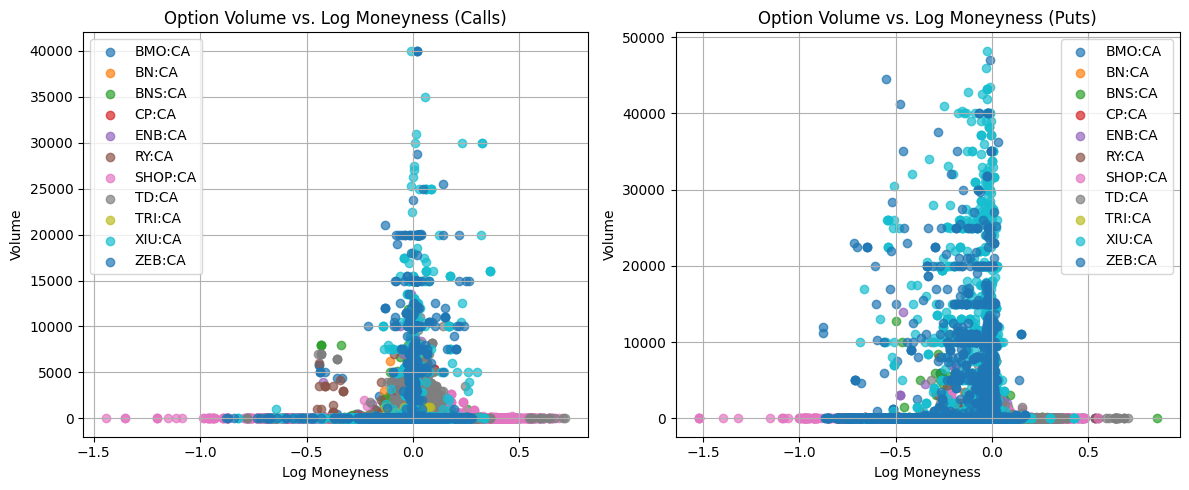

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample DataFrame structure
# df should have columns: 'underlying_symbol', 'underlying_price', 'strike', 'volume', 'option_type'

def plot_call_put_volume(df, stock_symbols):
    plt.figure(figsize=(12, 5))

    for option_type, subplot_index, title in zip(['call', 'put'], [1, 2], ['Calls', 'Puts']):
        plt.subplot(1, 2, subplot_index)  # Two subplots side by side

        for symbol in stock_symbols:
            stock_data = df[(df['underlying_symbol'] == symbol) & (df['option_type'] == option_type)].copy()
            
            # Compute log moneyness
            stock_data['log_moneyness'] = np.log(stock_data['strike'] / stock_data['underlying_price'])

            # Scatter plot for each stock symbol
            plt.scatter(stock_data['log_moneyness'], stock_data['volume'], alpha=0.7, label=symbol)

        plt.xlabel("Log Moneyness")
        plt.ylabel("Volume")
        plt.title(f"Option Volume vs. Log Moneyness ({title})")
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# Example usage
plot_call_put_volume(df[(df["volume"] > 0) & (df["volume"] < 50000)], df["underlying_symbol"].unique())


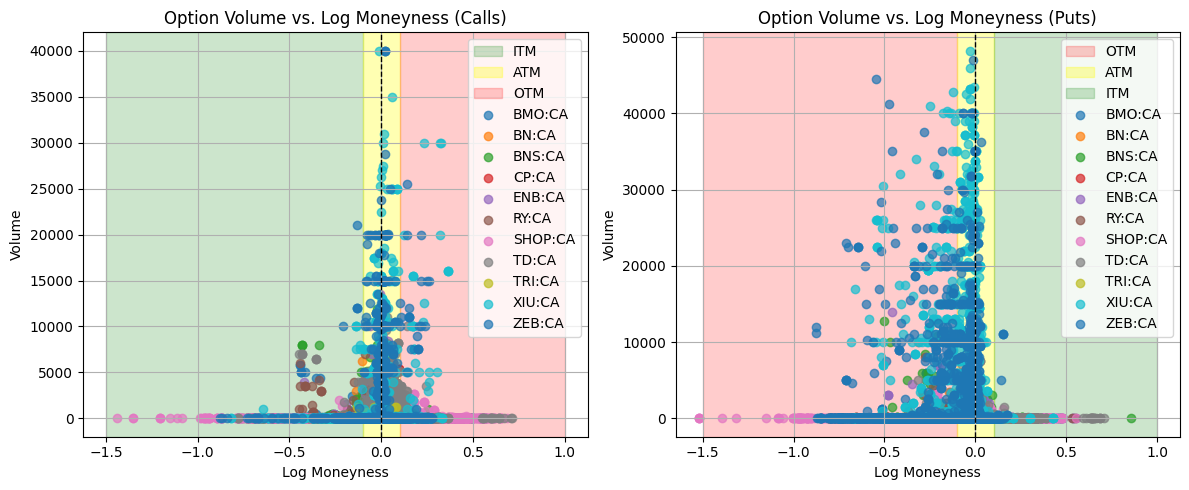

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample DataFrame structure
# df should have columns: 'underlying_symbol', 'underlying_price', 'strike', 'volume', 'option_type'

def plot_option_volume(df, stock_symbols):
    plt.figure(figsize=(12, 5))

    for option_type, subplot_index, title in zip(['call', 'put'], [1, 2], ['Calls', 'Puts']):
        plt.subplot(1, 2, subplot_index)  # Two subplots side by side
        if subplot_index == 1:
            # Background shading (ensure this comes before the scatter plot)
            plt.axvspan(-1.5, -0.1, color='green', alpha=0.2, label="ITM")  # ITM region
            plt.axvspan(-0.1, 0.1, color='yellow', alpha=0.3, label="ATM")  # ATM region
            plt.axvspan(0.1, 1, color='red', alpha=0.2, label="OTM")  # OTM region
        else:
            plt.axvspan(-1.5, -0.1, color='red', alpha=0.2, label="OTM")  # ITM region
            plt.axvspan(-0.1, 0.1, color='yellow', alpha=0.3, label="ATM")  # ATM region
            plt.axvspan(0.1, 1, color='green', alpha=0.2, label="ITM")  # OTM region

        for symbol in stock_symbols:
            stock_data = df[(df['underlying_symbol'] == symbol) & (df['option_type'] == option_type)].copy()
            
            # Compute log moneyness
            stock_data['log_moneyness'] = np.log(stock_data['strike'] / stock_data['underlying_price'])

            # Scatter plot for each stock symbol
            plt.scatter(stock_data['log_moneyness'], stock_data['volume'], alpha=0.7, label=symbol)

        plt.xlabel("Log Moneyness")
        plt.ylabel("Volume")
        plt.title(f"Option Volume vs. Log Moneyness ({title})")
        plt.axvline(0, color='black', linestyle='--', linewidth=1)  # Vertical line at ATM
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# Example usage
plot_option_volume(df[(df["volume"] > 0) & (df["volume"] < 50000)], df["underlying_symbol"].unique())


In [ ]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import brentq

# Black-Scholes formula for call option pricing
def black_scholes_call(S, K, T, r, sigma):
    """Calculate the Black-Scholes call option price."""
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Black-Scholes formula for put option pricing
def black_scholes_put(S, K, T, r, sigma):
    """Calculate the Black-Scholes put option price."""
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price

# Function to calculate the implied volatility for a call or put option
def implied_volatility(market_price, S, K, T, r, option_type='call'):
    """Calculate implied volatility using Brent's method."""
    # Define the objective function for call or put
    if option_type == 'call':
        def objective(sigma):
            return black_scholes_call(S, K, T, r, sigma) - market_price
    elif option_type == 'put':
        def objective(sigma):
            return black_scholes_put(S, K, T, r, sigma) - market_price
    else:
        raise ValueError("option_type must be either 'call' or 'put'")

    # Use Brent's method to find the root, expand bounds
    try:
        implied_vol = brentq(objective, 1e-6, 5)
    except ValueError as e:
        print(f"Error: {e}. Adjusting bounds and retrying...")
        # Try a wider range for volatility if error occurs
        try:
            implied_vol = brentq(objective, 1e-3, 10)
        except ValueError as e:
            print(f"Error: {e}. Failed to converge.")
            implied_vol = np.nan
    
    return implied_vol

# Example usage for a call
S = 100  # Current stock price
K = 105  # Strike price
T = 30 / 365  # Time to expiration in years (30 days)
r = 0.01  # Risk-free interest rate (1%)
market_price_call = 50  # Market price of the call option

# Calculate implied volatility for call option
implied_vol_call = implied_volatility(market_price_call, S, K, T, r, option_type='call')
print(f"Implied Volatility for Call: {implied_vol_call * 100:.2f}%")

# Example usage for a put
market_price_put = 6  # Market price of the put option

# Calculate implied volatility for put option
implied_vol_put = implied_volatility(market_price_put, S, K, T, r, option_type='put')
print(f"Implied Volatility for Put: {implied_vol_put * 100:.2f}%")

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.optimize import brentq
from joblib import Parallel, delayed

# Black-Scholes formula for call option pricing
def black_scholes_call(S, K, T, r, sigma):
    """Calculate the Black-Scholes call option price."""
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Black-Scholes formula for put option pricing
def black_scholes_put(S, K, T, r, sigma):
    """Calculate the Black-Scholes put option price."""
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

# Function to calculate implied volatility for a call or put option
def implied_volatility(row, r=0.01):
    """Calculate implied volatility using Brent's method."""
    option_type = row['option_type']
    S = row['underlying_price']  # Stock price
    K = row['strike']  # Strike price
    T = (pd.to_datetime(row['expiration']) - pd.to_datetime(row.name)).days / 365.0  # Time to expiration in years
    
    # Define the objective function for call or put
    a = row["a"]
    c = row["c"]
    sqt = row["T_sqrt"]
    if option_type == 'call':
        def objective(sigma):
            d1 = (a + T * 0.5 * (sigma * sigma)) / (sigma * sqt)
            d2 = d1 - sigma * sqt
            return S * norm.cdf(d1) - c * norm.cdf(d2) - row["close_mid"]
    elif option_type == 'put':
        def objective(sigma):
            d1 = (a + T * 0.5 * (sigma * sigma)) / (sigma * sqt)
            d2 = d1 - sigma * sqt
            return c * norm.cdf(-d2) - S * norm.cdf(-d1) - row["close_mid"]
    else:
        raise ValueError("option_type must be either 'call' or 'put'")
    
    # Use Brent's method to find the root
    try:
        implied_vol = brentq(objective, 1e-6, 5)
    except ValueError:
        # In case of failure, return NaN (or handle errors as needed)
        implied_vol = np.nan
    
    return implied_vol

# Function to process the data in parallel
def calculate_implied_volatility_parallel(df, n_jobs=-1):
    """Calculate implied volatility in parallel."""
    results = Parallel(n_jobs=n_jobs)(delayed(implied_volatility)(row) for _, row in df.iterrows())
    df['c_iv'] = results
    return df

# Example: Using the function to calculate implied volatility
# Create an example DataFrame with columns like 'expiration', 'strike', 'underlying_price', 'close_bid', 'close_ask'
# You should replace this with your actual DataFrame
df = merged[(merged["volume"] > 0) | merged["open_interest"] > 0].copy()

# Calculate implied volatility
df["close_mid"] = 0.5 * (df["close_bid"] + df["close_ask"])
df["dte"] = df["dte"] + 0.01 # Add a small value to avoid zero division
df["a"] = np.log(df["underlying_price"] / df["strike"]) + df["dte"] * 0.5
df["c"] = df["strike"] * np.exp(-0.01 * df["dte"])
df["T_sqrt"] = np.sqrt(df["dte"])
df = calculate_implied_volatility_parallel(merged, n_jobs=4)  # Use 4 cores for parallelization
print(df)

In [ ]:
df[(df["c_iv"].isna() == True) & (df["option_type"] == "call")]

C:\Users\viraj\AppData\Local\Temp\ipykernel_240\1729576304.py:38: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\viraj\OneDrive\Desktop\Apex Projects\apexenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


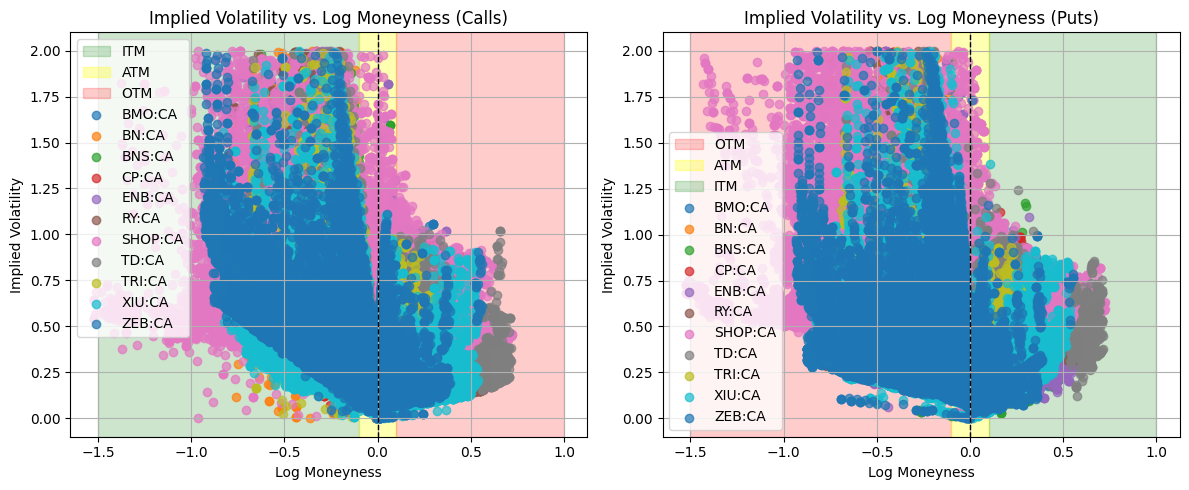

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample DataFrame structure
# df should have columns: 'underlying_symbol', 'underlying_price', 'strike', 'implied_volatility', 'option_type'

def plot_option_iv(df, stock_symbols):
    plt.figure(figsize=(12, 5))

    for option_type, subplot_index, title in zip(['call', 'put'], [1, 2], ['Calls', 'Puts']):
        plt.subplot(1, 2, subplot_index)  # Two subplots side by side
        if subplot_index == 1:
            plt.axvspan(-1.5, -0.1, color='green', alpha=0.2, label="ITM")  # ITM region
            plt.axvspan(-0.1, 0.1, color='yellow', alpha=0.3, label="ATM")  # ATM region
            plt.axvspan(0.1, 1, color='red', alpha=0.2, label="OTM")  # OTM region
        else:
            plt.axvspan(-1.5, -0.1, color='red', alpha=0.2, label="OTM")  # ITM region
            plt.axvspan(-0.1, 0.1, color='yellow', alpha=0.3, label="ATM")  # ATM region
            plt.axvspan(0.1, 1, color='green', alpha=0.2, label="ITM")  # OTM region

        for symbol in stock_symbols:
            stock_data = df[(df['underlying_symbol'] == symbol) & (df['option_type'] == option_type)].copy()
            
            # Compute log moneyness
            stock_data['log_moneyness'] = np.log(stock_data['strike'] / stock_data['underlying_price'])

            # Scatter plot for each stock symbol
            plt.scatter(stock_data['log_moneyness'], stock_data['implied_volatility'], alpha=0.7, label=symbol)

        plt.xlabel("Log Moneyness")
        plt.ylabel("Implied Volatility")
        plt.title(f"Implied Volatility vs. Log Moneyness ({title})")
        plt.axvline(0, color='black', linestyle='--', linewidth=1)  # Vertical line at ATM
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# Example usage
plot_option_iv(df[(df["implied_volatility"] > 0) & (df["implied_volatility"] < 2)], df["underlying_symbol"].unique())


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from joblib import Parallel, delayed

# Cache for binomial tree vega calculations
binomial_cache = {}

def black_scholes_vega(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return S * norm.pdf(d1) * np.sqrt(T)

def binomial_tree_price(S, K, T, r, sigma, option_type, steps=100):
    """ Compute American option price using binomial tree """
    key = (S, K, T, r, sigma, option_type, steps)
    if key in binomial_cache:
        return binomial_cache[key]

    dt = T / steps
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    stock_price = np.zeros(steps + 1)
    option_value = np.zeros(steps + 1)

    for j in range(steps + 1):
        stock_price[j] = S * (u ** j) * (d ** (steps - j))
        option_value[j] = max(0, stock_price[j] - K) if option_type == 'call' else max(0, K - stock_price[j])

    for i in range(steps - 1, -1, -1):
        option_value[:i+1] = np.exp(-r * dt) * (p * option_value[1:i+2] + (1 - p) * option_value[:i+1])
        stock_price[:i+1] /= u  # Reverse tree
        if option_type == 'call':
            option_value[:i+1] = np.maximum(option_value[:i+1], stock_price[:i+1] - K)
        else:
            option_value[:i+1] = np.maximum(option_value[:i+1], K - stock_price[:i+1])

    binomial_cache[key] = option_value[0]
    return option_value[0]

def binomial_tree_vega(S, K, T, r, sigma, option_type, steps=100, epsilon=0.01):
    """ Compute Vega using finite differences on binomial tree pricing """
    price_up = binomial_tree_price(S, K, T, r, sigma + epsilon, option_type, steps)
    price_down = binomial_tree_price(S, K, T, r, sigma - epsilon, option_type, steps)
    return (price_up - price_down) / (2 * epsilon)

def compute_vega(df):
    df = df.copy()
    
    r = 0.02  # Assume a constant risk-free rate of 2%
    df['T'] = df['dte'] / 365  # Convert days to years
    
    # Vectorized Black-Scholes Vega
    valid_rows = df['T'] > 0
    df.loc[valid_rows, 'vega_bs'] = black_scholes_vega(
        df.loc[valid_rows, 'underlying_price'].values,
        df.loc[valid_rows, 'strike'].values,
        df.loc[valid_rows, 'T'].values,
        r,
        df.loc[valid_rows, 'implied_volatility'].values
    )

    # Parallelize Binomial Vega calculations
    unique_cases = df.loc[valid_rows, ['underlying_price', 'strike', 'T', 'implied_volatility', 'option_type']].drop_duplicates()
    binomial_vegas = Parallel(n_jobs=-1)(
        delayed(binomial_tree_vega)(
            row['underlying_price'], row['strike'], row['T'], r, row['implied_volatility'], row['option_type']
        ) for _, row in unique_cases.iterrows()
    )

    unique_cases['vega_binomial'] = binomial_vegas

    # Merge back computed binomial vegas
    df = df.merge(unique_cases[['underlying_price', 'strike', 'T', 'implied_volatility', 'option_type', 'vega_binomial']], 
                  on=['underlying_price', 'strike', 'T', 'implied_volatility', 'option_type'], how='left')

    return df

# Apply Vega calculation
df = compute_vega(df)

# Display first few rows
df[['underlying_symbol', 'strike', 'implied_volatility', 'vega_bs', 'vega_binomial']].head()

In [12]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from joblib import Parallel, delayed

# Cache for binomial tree vega calculations (moved inside the function)
def black_scholes_vega(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return S * norm.pdf(d1) * np.sqrt(T)

def binomial_tree_price(S, K, T, r, sigma, option_type, steps=100):
    """ Compute American option price using binomial tree """
    dt = T / steps
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    stock_price = np.zeros(steps + 1)
    option_value = np.zeros(steps + 1)

    for j in range(steps + 1):
        stock_price[j] = S * (u ** j) * (d ** (steps - j))
        option_value[j] = max(0, stock_price[j] - K) if option_type == 'call' else max(0, K - stock_price[j])

    for i in range(steps - 1, -1, -1):
        option_value[:i+1] = np.exp(-r * dt) * (p * option_value[1:i+2] + (1 - p) * option_value[:i+1])
        stock_price[:i+1] /= u  # Reverse tree
        if option_type == 'call':
            option_value[:i+1] = np.maximum(option_value[:i+1], stock_price[:i+1] - K)
        else:
            option_value[:i+1] = np.maximum(option_value[:i+1], K - stock_price[:i+1])

    return option_value[0]

def binomial_tree_vega(S, K, T, r, sigma, option_type, steps=100, epsilon=0.05):  # Increased epsilon
    """ Compute Vega using finite differences on binomial tree pricing """
    price_up = binomial_tree_price(S, K, T, r, sigma + epsilon, option_type, steps)
    price_down = binomial_tree_price(S, K, T, r, sigma - epsilon, option_type, steps)
    return (price_up - price_down) / (2 * epsilon)

def compute_vega(df):
    df = df.copy()
    
    r = 0.02  # Assume a constant risk-free rate of 2%
    df['T'] = df['dte'] / 365  # Convert days to years
    
    # Vectorized Black-Scholes Vega
    valid_rows = df['T'] > 0

    # Parallelize Binomial Vega calculations (safely access unique rows)
    unique_cases = df.loc[valid_rows, ['underlying_price', 'strike', 'T', 'implied_volatility', 'option_type']].drop_duplicates()
    
    # Parallel Vega Calculation (without global cache)
    binomial_vegas = Parallel(n_jobs=-1)(
        delayed(binomial_tree_vega)(row['underlying_price'], row['strike'], row['T'], r, row['implied_volatility'], row['option_type'])
        for _, row in unique_cases.iterrows()
    )

    unique_cases['vega_binomial'] = binomial_vegas

    # Merge back computed binomial vegas
    df = df.merge(unique_cases[['underlying_price', 'strike', 'T', 'implied_volatility', 'option_type', 'vega_binomial']], 
                  on=['underlying_price', 'strike', 'T', 'implied_volatility', 'option_type'], how='left')

    return df

# Apply Vega calculation
df = compute_vega(df)

# Display first few rows
df[['underlying_symbol', 'strike', 'implied_volatility', 'vega_bs', 'vega_binomial']].head()


KeyError: "['vega_binomial'] not in index"

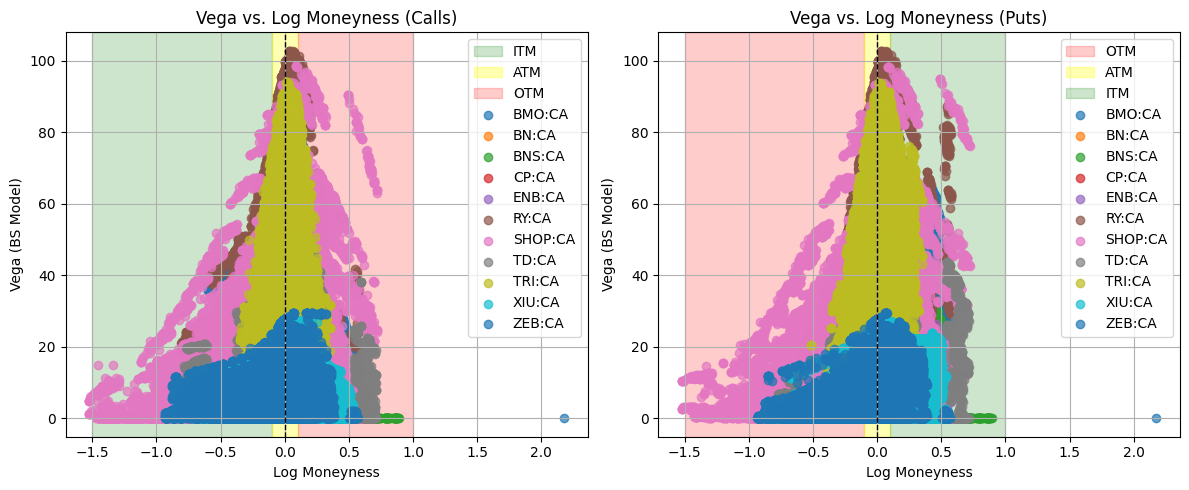

In [9]:
def plot_option_vega(df, stock_symbols):
    plt.figure(figsize=(12, 5))

    for option_type, subplot_index, title in zip(['call', 'put'], [1, 2], ['Calls', 'Puts']):
        plt.subplot(1, 2, subplot_index)  # Two subplots side by side
        if subplot_index == 1:
            plt.axvspan(-1.5, -0.1, color='green', alpha=0.2, label="ITM")  # ITM region
            plt.axvspan(-0.1, 0.1, color='yellow', alpha=0.3, label="ATM")  # ATM region
            plt.axvspan(0.1, 1, color='red', alpha=0.2, label="OTM")  # OTM region
        else:
            plt.axvspan(-1.5, -0.1, color='red', alpha=0.2, label="OTM")  # ITM region
            plt.axvspan(-0.1, 0.1, color='yellow', alpha=0.3, label="ATM")  # ATM region
            plt.axvspan(0.1, 1, color='green', alpha=0.2, label="ITM")  # OTM region

        for symbol in stock_symbols:
            stock_data = df[(df['underlying_symbol'] == symbol) & (df['option_type'] == option_type)].copy()
            
            # Compute log moneyness
            stock_data['log_moneyness'] = np.log(stock_data['strike'] / stock_data['underlying_price'])

            # Scatter plot for each stock symbol using 'vega_bs' instead of 'implied_volatility'
            plt.scatter(stock_data['log_moneyness'], stock_data['vega_bs'], alpha=0.7, label=symbol)

        plt.xlabel("Log Moneyness")
        plt.ylabel("Vega (BS Model)")
        plt.title(f"Vega vs. Log Moneyness ({title})")
        plt.axvline(0, color='black', linestyle='--', linewidth=1)  # Vertical line at ATM
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# Example usage
plot_option_vega(df, df["underlying_symbol"].unique())


C:\Users\viraj\AppData\Local\Temp\ipykernel_240\964645639.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\viraj\OneDrive\Desktop\Apex Projects\apexenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


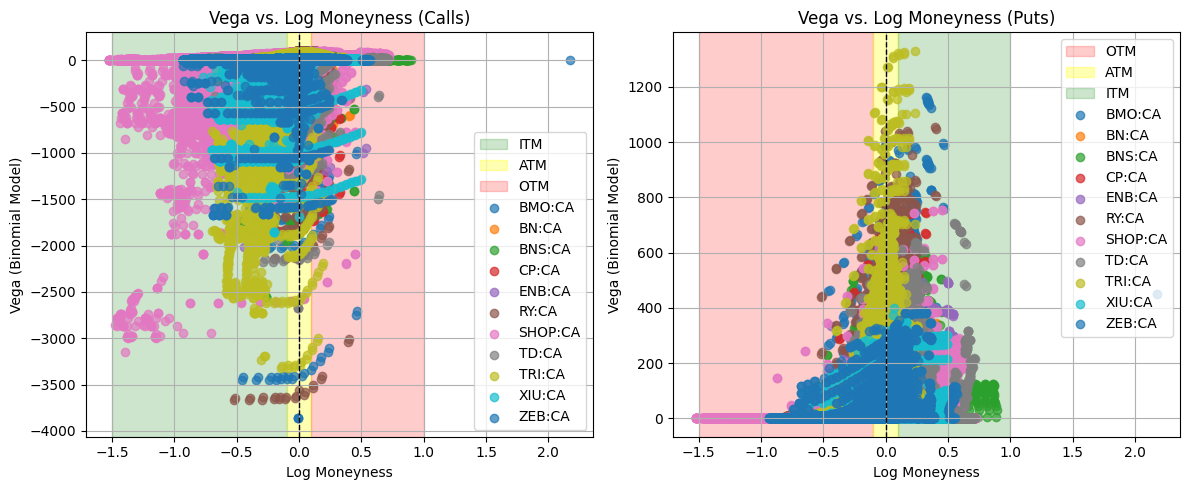

In [18]:
def plot_option_vega(df, stock_symbols):
    plt.figure(figsize=(12, 5))

    for option_type, subplot_index, title in zip(['call', 'put'], [1, 2], ['Calls', 'Puts']):
        plt.subplot(1, 2, subplot_index)  # Two subplots side by side
        if subplot_index == 1:
            plt.axvspan(-1.5, -0.1, color='green', alpha=0.2, label="ITM")  # ITM region
            plt.axvspan(-0.1, 0.1, color='yellow', alpha=0.3, label="ATM")  # ATM region
            plt.axvspan(0.1, 1, color='red', alpha=0.2, label="OTM")  # OTM region
        else:
            plt.axvspan(-1.5, -0.1, color='red', alpha=0.2, label="OTM")  # ITM region
            plt.axvspan(-0.1, 0.1, color='yellow', alpha=0.3, label="ATM")  # ATM region
            plt.axvspan(0.1, 1, color='green', alpha=0.2, label="ITM")  # OTM region

        for symbol in stock_symbols:
            stock_data = df[(df['underlying_symbol'] == symbol) & (df['option_type'] == option_type)].copy()
            
            # Compute log moneyness
            stock_data['log_moneyness'] = np.log(stock_data['strike'] / stock_data['underlying_price'])

            # Scatter plot for each stock symbol using 'vega_bs' instead of 'implied_volatility'
            plt.scatter(stock_data['log_moneyness'], stock_data['vega_binomial_y'], alpha=0.7, label=symbol)

        plt.xlabel("Log Moneyness")
        plt.ylabel("Vega (Binomial Model)")
        plt.title(f"Vega vs. Log Moneyness ({title})")
        plt.axvline(0, color='black', linestyle='--', linewidth=1)  # Vertical line at ATM
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# Example usage
plot_option_vega(df[df["vega_binomial_y"] > -5000], df["underlying_symbol"].unique())
